# 타이타닉 데이터를 활용한 탑승자의 생사 예측

In [1]:
train_df <- read.csv("../Data/Titanic_train.csv")
head(train_df)
tail(train_df)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39,0,5,382652,29.125,,Q
887,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.000,,S
888,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.000,B42,S
889,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NA,1,2,W./C. 6607,23.450,,S
890,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.000,C148,C
891,891,0,3,"Dooley, Mr. Patrick",male,32,0,0,370376,7.750,,Q


In [2]:
str(train_df) # age에 na, embarked에 "" -> 원래 항구 3개

'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : Factor w/ 891 levels "Abbing, Mr. Anthony",..: 109 191 354 273 16 555 516 625 413 577 ...
 $ Sex        : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age        : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : Factor w/ 681 levels "110152","110413",..: 524 597 670 50 473 276 86 396 345 133 ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : Factor w/ 148 levels "","A10","A14",..: 1 83 1 57 1 1 131 1 1 1 ...
 $ Embarked   : Factor w/ 4 levels "","C","Q","S": 4 2 4 4 4 3 4 4 4 2 ...


### 컬럼 내용 확인
- Survived : 생존 여부 (0:사망, 1:생존)
- Pclass : 티켓 등급 (1:1등급, 2:2등급, 3:3등급)
- SibSp : sibling 함께 탑승한 형제, 자매, 배우자의 수 
- Parch : parent and childrend 함께 탑승한 부모, 자식의 수 
- Fare : 운임 
- Cabin :  객실 번호
- Embarked : 탑승항구(C:Chersbourg, Q:Queenstown, S=Southampton)

In [3]:
# 각 컬럼별 na 확인 ($에서 for문 사용 불가 []로 대체)

for(i in 1:ncol(train_df)){
    cat(colnames(train_df)[i], "=", sum(is.na(train_df[,i])), "\n")
} 

PassengerId = 0 
Survived = 0 
Pclass = 0 
Name = 0 
Sex = 0 
Age = 177 
SibSp = 0 
Parch = 0 
Ticket = 0 
Fare = 0 
Cabin = 0 
Embarked = 0 


In [4]:
# 각 컬럼별 " "확인

for(i in 1:ncol(train_df)){
    cat(colnames(train_df)[i], "=",  
        nrow(subset(train_df, train_df[,i] == "")), "\n")
} 

PassengerId = 0 
Survived = 0 
Pclass = 0 
Name = 0 
Sex = 0 
Age = 0 
SibSp = 0 
Parch = 0 
Ticket = 0 
Fare = 0 
Cabin = 687 
Embarked = 2 


In [5]:
177/nrow(train_df) # 20%

[1] 0.1986532

In [6]:
# train_df$Age가 Na인 데이터셋만 따로 구성한다. 
head(subset(train_df, is.na(train_df$Age)))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
6,6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q
18,18,1,2,"Williams, Mr. Charles Eugene",male,NA,0,0,244373,13.0000,,S
20,20,1,3,"Masselmani, Mrs. Fatima",female,NA,0,0,2649,7.2250,,C
27,27,0,3,"Emir, Mr. Farred Chehab",male,NA,0,0,2631,7.2250,,C
29,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NA,0,0,330959,7.8792,,Q
30,30,0,3,"Todoroff, Mr. Lalio",male,NA,0,0,349216,7.8958,,S


In [7]:
# train_df$Age가 Na가 아닌 데이터셋만 따로 구성한다. (! 반대)
head(subset(train_df, !is.na(train_df$Age)))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
7,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S


In [8]:
tail(train_df) #head와 tail을 보면 생존여부와 성별, 등급 간의 연관성이 보임. 여성들이 주로 살았고, 등급이 높은 사람들은 남성일지라도 생존한 경우. 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39,0,5,382652,29.125,,Q
887,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.000,,S
888,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.000,B42,S
889,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NA,1,2,W./C. 6607,23.450,,S
890,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.000,C148,C
891,891,0,3,"Dooley, Mr. Patrick",male,32,0,0,370376,7.750,,Q


In [9]:
library(doBy)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [10]:
# survived 기준으로 dataset 정렬 
train_df <- orderBy(~ Survived, data=train_df)
head(train_df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
5,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q
7,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
8,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,,S
13,13,0,3,"Saundercock, Mr. William Henry",male,20,0,0,A/5. 2151,8.0500,,S


In [11]:
# rownames 정렬 (orderBy와 rownames는 세트로 수행)
rownames(train_df) <- c()
tail(train_df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28,1,0,P/PP 3381,24.0000,,C
887,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15,0,0,2667,7.2250,,C
888,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56,0,1,11767,83.1583,C50,C
889,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25,0,1,230433,26.0000,,S
890,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,B42,S
891,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C148,C


In [12]:
# Survived 컬럼이 target column으로 적합한지 확인 (best는 5:5)
# 사망자수 
nrow(subset(train_df, Survived == 0))
# 생존자수
nrow(subset(train_df, Survived == 1))

nrow(subset(train_df, Survived == 1)) / nrow(train_df) # 생존자수는 약 40%... (비율은 마지노선인 6:4가 안된다)
# 5:5로 맞춰주기 위해 사망자수(549명)을 생존자수(342명)과 맞게 342명으로 줄이기 sample()

[1] 549

[1] 342

[1] 0.3838384

In [13]:
# 생존과 사망 비율을 3D Pie Chart로 생성 

# 사망자수 
deathCount <- sum(train_df$Survived ==0)
# 생존자수 
liveCount <- sum(train_df$Survived ==1)
#전체인원
totalCount <- deathCount + liveCount
totalCount; deathCount; liveCount

[1] 891

[1] 549

[1] 342

In [14]:
SurvivedVector <- c(deathCount, liveCount)
SurvivedVector

[1] 549 342

In [15]:
ratio <- round(SurvivedVector / totalCount * 100, 2)
ratio
label <- paste(c("사망","생존"), "\n", ratio, "%")
label

[1] 61.62 38.38

[1] "사망 \n 61.62 %" "생존 \n 38.38 %"

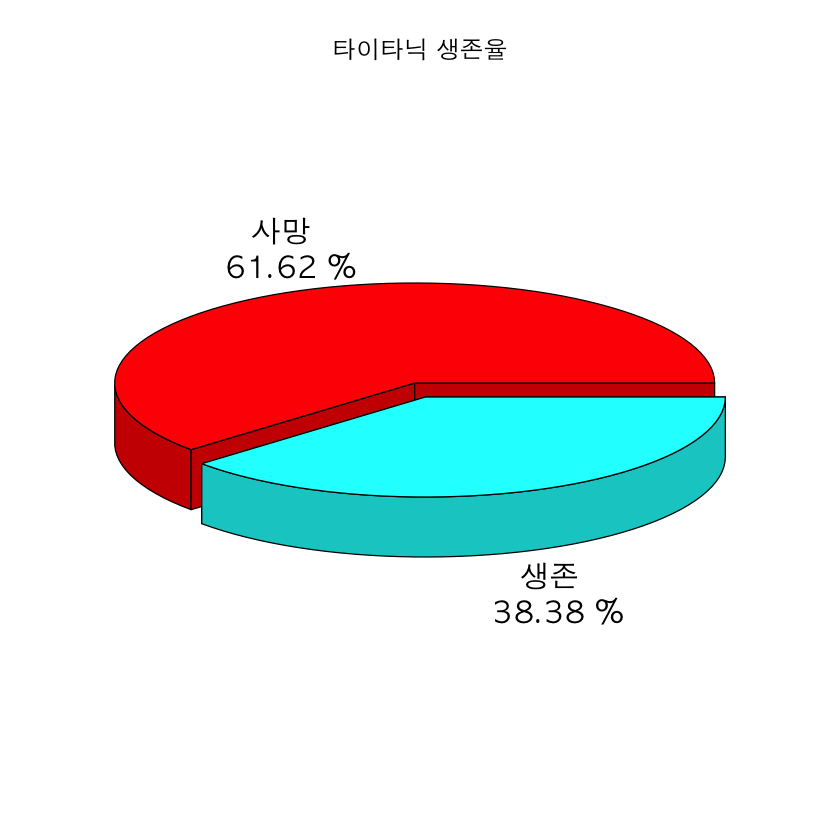

In [16]:
options(warn = -1)
par(family = "AppleGothic")
library(plotrix)

pie3D(SurvivedVector,
     main = "타이타닉 생존율",
     labels = label,
     explode = 0.05 #갈라놓음
     )

In [17]:
# 막대 그래프로 생존자수와 사망자수를 시각화 
table(c(deathCount, liveCount)) 
#or 
table(train_df$Survived)


342 549 
  1   1 


  0   1 
549 342 

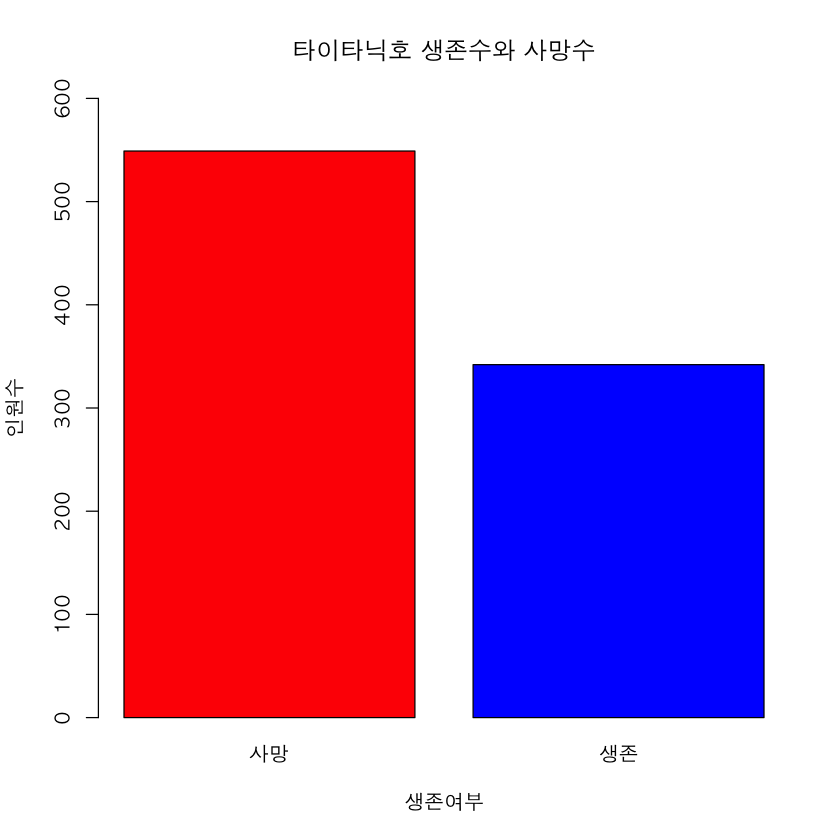

In [18]:
# 1)
par(family = "AppleGothic")
barplot(c(deathCount, liveCount),
       ylim = c(0,600),
       main = "타이타닉호 생존수와 사망수",
       xlab = "생존여부",
       ylab = "인원수",
       col = c("red","blue"),
       names = c("사망", "생존"))

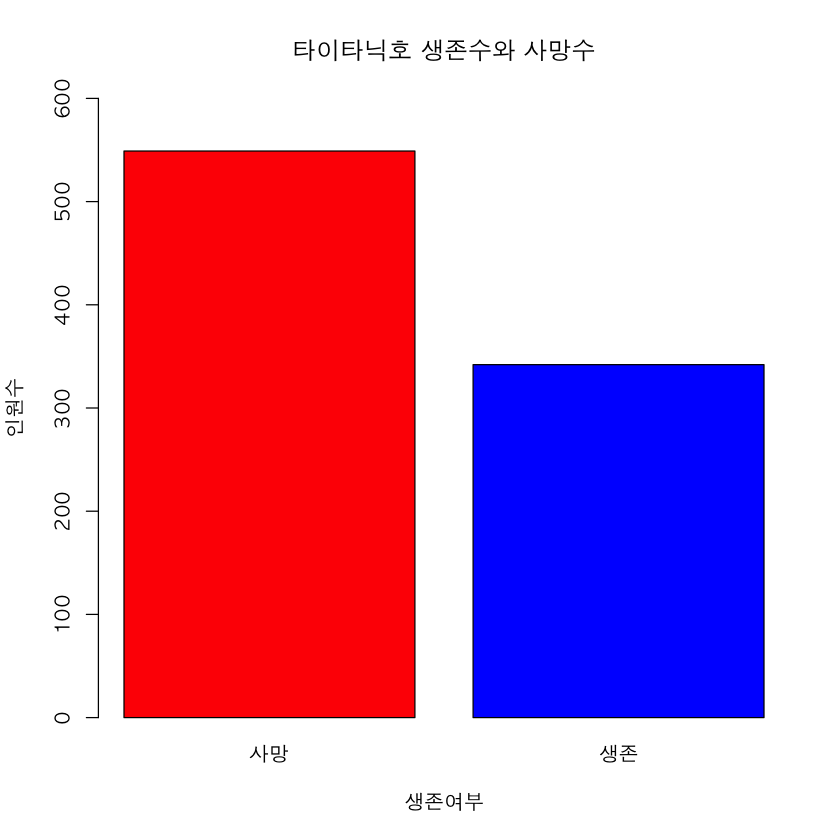

In [19]:
# 2)
par(family = "AppleGothic")
barplot(table(train_df$Survived),
       ylim = c(0,600),
       main = "타이타닉호 생존수와 사망수",
       xlab = "생존여부",
       ylab = "인원수",
       col = c("red","blue"),
       names = c("사망", "생존"))

In [20]:
# *** Survived 컬럼은 Target Data로 적합하다 

In [21]:
head(train_df)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,,S
13,0,3,"Saundercock, Mr. William Henry",male,20,0,0,A/5. 2151,8.0500,,S


## Feature Column 구성
- 데이터끼리 어느 정도 차이나는 것이 좋다

In [22]:
# Sex 컬럼 분류 확인 
unique(train_df$Sex) # levels 확인해야함 ""와 같이 빈칸 데이터 있을 수도 있으니까 (ex. unique(train_df$Embarked))

[1] male   female
Levels: female male

In [23]:
# 여성과 남성의 인원수 확인 
# 여성의 인원수 
femaleCount <- nrow(subset(train_df, Sex == "female"))
# 남성의 인원수 
maleCount <- nrow(subset(train_df, Sex == "male"))
femaleCount; maleCount

[1] 314

[1] 577

In [24]:
# ** Sex 컬럼은 Featured Column으로 적합하다.

In [25]:
# 여성의 생존과 사망 인원수 확인하기 
female <- subset(train_df, Sex == "female")
# 여성의 생존수 
femaleSurvive <- nrow(subset(female, Survived == 1))
# 여성의 사망수 
femaleDeath <- nrow(subset(female, Survived == 0)) # 남성 생존수 구하는 방법으로 하면 변수 생성하지 않아도 됨.
femaleSurvive; femaleDeath

[1] 233

[1] 81

In [26]:
# 남성의 생존수 
maleSurvive <- nrow(subset(train_df, (Sex =="male") & (Survived == 1)))
# 남성의 사망수 
maleDeath <- nrow(subset(train_df, (Sex =="male") & (Survived == 0)))
maleSurvive;maleDeath
male_totalCount <- maleSurvive + maleDeath

[1] 109

[1] 468

In [27]:
# 여성의 생존율과 사망율 
# 여성의 생존율 
cat("여성의 생존율:", round(femaleSurvive / femaleCount * 100,2),"%","\n")
# 여성의 사망율 
cat("여성의 생존율:", round(femaleDeath / femaleCount * 100,2),"%","\n")

여성의 생존율: 74.2 % 
여성의 생존율: 25.8 % 


In [28]:
# 남성의 생존율과 사망율 
# 남성의 생존율 
cat("남성의 생존율:", round(maleSurvive / maleCount * 100,2),"%","\n")
# 남성의 사망율 
cat("남성의 생존율:", round(maleDeath / maleCount * 100,2),"%","\n")

남성의 생존율: 18.89 % 
남성의 생존율: 81.11 % 


In [29]:
# 남성 생사 비율을 3d pie chart로 시각화하기 
Male_SurvivedVector <- c(maleDeath, maleSurvive)
Male_SurvivedVector

[1] 468 109

In [30]:
male_ratio <- round(Male_SurvivedVector / male_totalCount * 100, 2)
male_label <- paste(c("사망","생존"), "\n", male_ratio, "%")

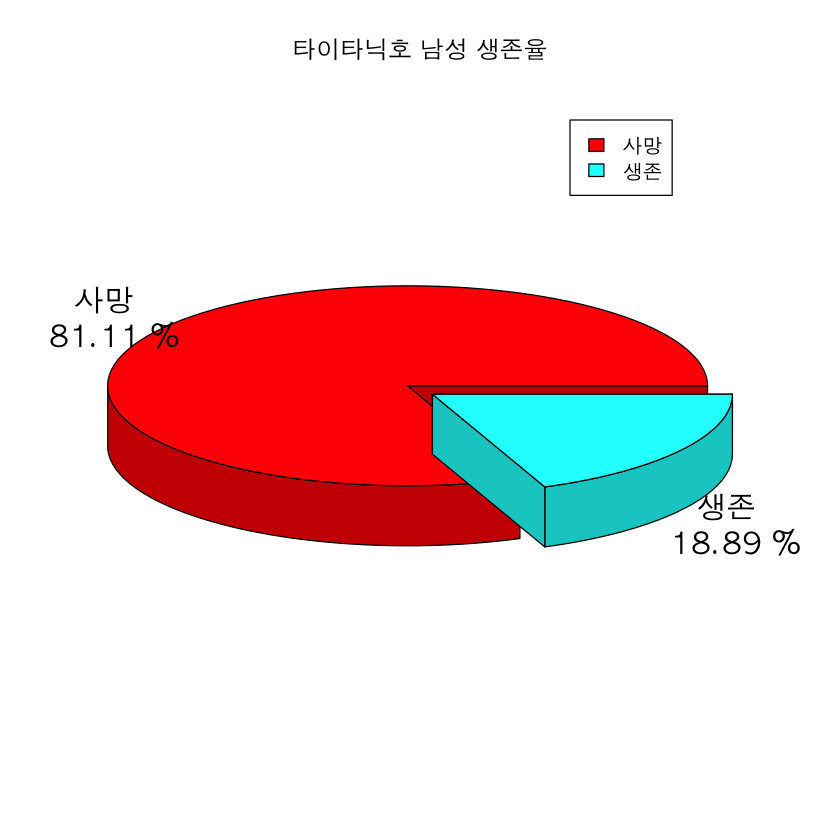

In [31]:
par(family = "AppleGothic")

pie3D(Male_SurvivedVector,
     main = "타이타닉호 남성 생존율",
     labels = male_label,
     explode = 0.05
     )

legend(0.5,1, # (1,1)로 해보고 흔적 본다음에 줄이기 
      c("사망","생존"),
       fill = rainbow(length(SurvivedVector))
      )

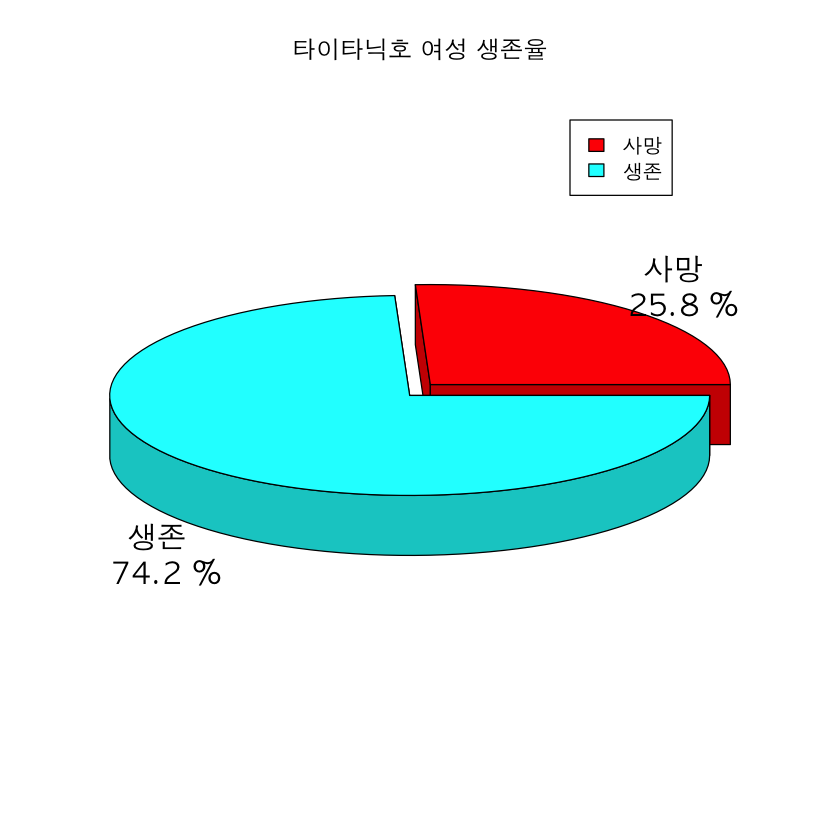

In [32]:
# 여성 생사 비율을 3d pie chart로 시각화하기 
Female_SurvivedVector <- c(femaleDeath, femaleSurvive)
female_ratio <- round(Female_SurvivedVector / femaleCount * 100, 2)
female_label <- paste(c("사망","생존"), "\n", female_ratio, "%")

par(family = "AppleGothic")

pie3D(Female_SurvivedVector,
     main = "타이타닉호 여성 생존율",
     labels = female_label,
     explode = 0.05
     )

legend(0.5,1, 
      c("사망","생존"),
       fill = rainbow(length(SurvivedVector))
      )


314 577 
  1   1 

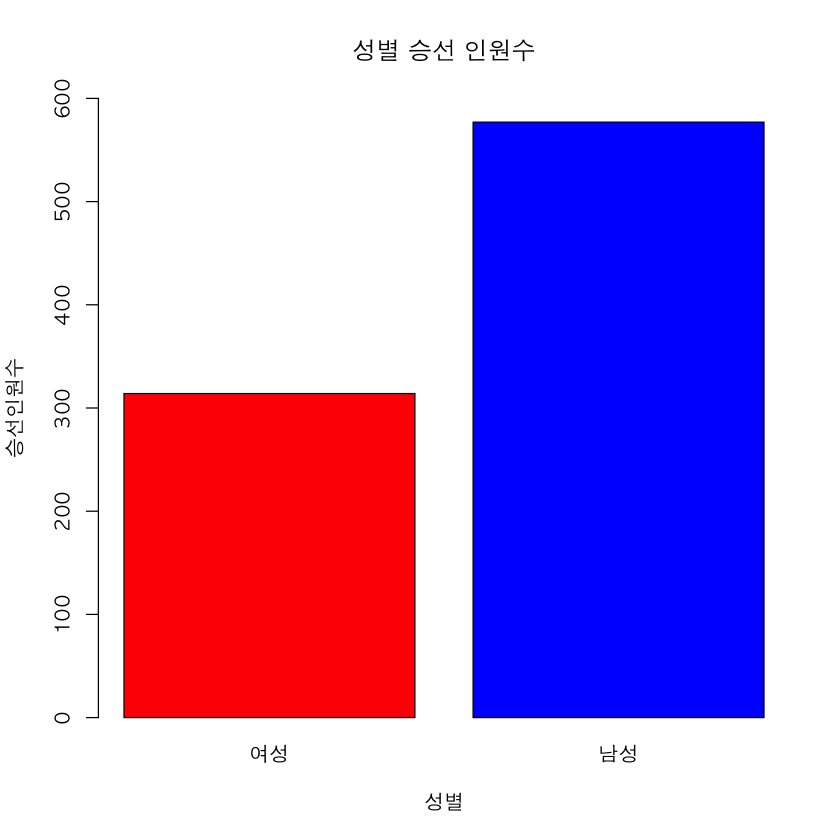

In [33]:
# 남녀 승선 인원을 막대 그래프로 시각화 
table(c(femaleCount, maleCount)) # or table(train_df$Sex)

par(family = "AppleGothic")
barplot(c(femaleCount, maleCount),
       ylim = c(0,600),
       main = "성별 승선 인원수",
       xlab = "성별",
       ylab = "승선인원수",
       col = c("red","blue"),
       names = c("여성", "남성"))

In [34]:
# 현재까지: [Survived] <- [Sex] = [Target] <- [Feature Column]

## 티켓 등급 분석

In [35]:
table(train_df$Pclass)


  1   2   3 
216 184 491 

In [36]:
# Pclass는 target column으로 사용 가능 

In [37]:
# 1등 객실의 여성 생존율 
femaleCount1st <- nrow(subset(train_df, (Sex == "female")& (Pclass == 1)))
femaleLiveCount1st <- nrow(subset(train_df, (Sex == "female")& (Pclass == 1) & (Survived ==1)))

In [38]:
#round(nrow(subset(train_df, Sex == "female"& Pclass == 1 & Survived ==1)) / 
#nrow(subset(train_df, Sex == "female"& Pclass == 1)) * 100,2)
cat("1등 객실의 여성 생존율은", femaleLiveCount1st, "/",
    round(femaleLiveCount1st / femaleCount1st * 100,2), "%")

1등 객실의 여성 생존율은 91 / 96.81 %

In [39]:
# 1,2,3등 객실의 여성 생존율은 for문을 이용해 해결 
for(i in 1:3){
    femaleCount1st <-
        nrow(subset(train_df, (Sex == "female")& (Pclass == i)))
    femaleLiveCount1st <- 
        nrow(subset(train_df, (Sex == "female")& (Pclass == i) & (Survived ==1)))
   
    cat("1등 객실의 여성 생존율은", femaleLiveCount1st, "/",
    femaleCount1st, ",",
    round(femaleLiveCount1st / femaleCount1st * 100,2), "%", "\n"
       )
    cat("---------------------------\n")
    
}

1등 객실의 여성 생존율은 91 / 94 , 96.81 % 
---------------------------
1등 객실의 여성 생존율은 70 / 76 , 92.11 % 
---------------------------
1등 객실의 여성 생존율은 72 / 144 , 50 % 
---------------------------


In [40]:
# 1,2,3등 객실의 여성과 남성 생존율은 for문을 이용해 해결  # day 10 ifelse=(가정 만족하면, 이것을 쓰고, 아니면 다른 것)
SexVector <- c("female", "male")

for(j in SexVector){
    for(i in 1:3){
        femaleCount1st <-
            nrow(subset(train_df, (Sex == j)& (Pclass == i)))
        femaleLiveCount1st <- 
            nrow(subset(train_df, (Sex == j)& (Pclass == i) & (Survived ==1)))
   
    cat(i, "등 객실의", ifelse(j == "female", "여성", "남성"),"생존율은", femaleLiveCount1st, "/",
    femaleCount1st, ",",
    round(femaleLiveCount1st / femaleCount1st * 100,2), "%", "\n"
       )
    cat("---------------------------\n")
    
}}

1 등 객실의 여성 생존율은 91 / 94 , 96.81 % 
---------------------------
2 등 객실의 여성 생존율은 70 / 76 , 92.11 % 
---------------------------
3 등 객실의 여성 생존율은 72 / 144 , 50 % 
---------------------------
1 등 객실의 남성 생존율은 45 / 122 , 36.89 % 
---------------------------
2 등 객실의 남성 생존율은 17 / 108 , 15.74 % 
---------------------------
3 등 객실의 남성 생존율은 47 / 347 , 13.54 % 
---------------------------


In [41]:
# 1,2,3등 객실의 여성과 남성 생존율을 벡터로 저장하기   

# 벡터 초기화 
maleData <- c()
femaleData <- c()

SexVector <- c("female", "male")

for(j in SexVector){
    for(i in 1:3){
        femaleCount1st <-
            nrow(subset(train_df, (Sex == j)& (Pclass == i)))
        femaleLiveCount1st <- 
            nrow(subset(train_df, (Sex == j)& (Pclass == i) & (Survived ==1)))
   
    cat(i, "등 객실의", ifelse(j == "female", "여성", "남성"),"생존율은", femaleLiveCount1st, "/",
    femaleCount1st, ",",
    round(femaleLiveCount1st / femaleCount1st * 100,2), "%", "\n"
       )
    cat("---------------------------\n")
    
    if(j == "female"){
        femaleData[i] = round(femaleLiveCount1st / femaleCount1st * 100,2)
        }else{
        maleData[i] = round(femaleLiveCount1st / femaleCount1st * 100,2) 
        }
    }
}

1 등 객실의 여성 생존율은 91 / 94 , 96.81 % 
---------------------------
2 등 객실의 여성 생존율은 70 / 76 , 92.11 % 
---------------------------
3 등 객실의 여성 생존율은 72 / 144 , 50 % 
---------------------------
1 등 객실의 남성 생존율은 45 / 122 , 36.89 % 
---------------------------
2 등 객실의 남성 생존율은 17 / 108 , 15.74 % 
---------------------------
3 등 객실의 남성 생존율은 47 / 347 , 13.54 % 
---------------------------


In [42]:
femaleData

[1] 96.81 92.11 50.00

In [43]:
maleData

[1] 36.89 15.74 13.54